# Digital Signal Image Processing Assignment - Linear Time-Invariant Systems

**Riccardo Caprile 4370774**

Description of the assignment : Compute the convolution product between the functions f and g where f; g : [a; b] -> R with

$$f(t) = pe^{qt}sin(ln(1+rt^2)) $$ and $$g(t) = p_T(t)$$

and p; q; r and T sampled uniformly in the interval [0; 2]. 


Here again sample a uniformly in the
interval [-2-1] and b uniformly in the interval [1; 2].

Verify that you obtain the same result in both the temporal and the frequency domain.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

# Uniform Sampling

In [51]:
p = np.random.uniform(0,2)
q = np.random.uniform(0,2)
r = np.random.uniform(0,2)
T = np.random.uniform(0,2)
a = np.random.uniform(-2,-1)
b = np.random.uniform(1,2)

In [76]:
delta = 1/1000

t = np.arange(-8, 8, delta)

# number of samples
print("We consider %d samples"%t.size)

We consider 16000 samples


# Let's define the two signals $f(t)$ and $g(t)$

In [77]:
f_t = np.zeros(len(t))
g_t = np.zeros(len(t))

In [78]:
#Definition of f(t)

def f(t,a,b):
    for i in range(len(t)):
        if t[i] >= a and t[i] <= b:
                f_t[i] = p * (np.exp(q * t[i]) * np.sin(np.log(1 + r * (t[i] ** 2))))
        else : f_t[i] = 0
    return f_t

def g(t,T,a,b):
    for i in range(len(t)):
        if t[i] >= a and t[i] <= b:
            if abs(t[i]) <= T : g_t[i] = 1
            else : g_t[i] = 0
    return g_t
        


# Let's plot the two signals 

In [79]:
f_t = f(t,a,b)
g_t = g(t,T,a,b)

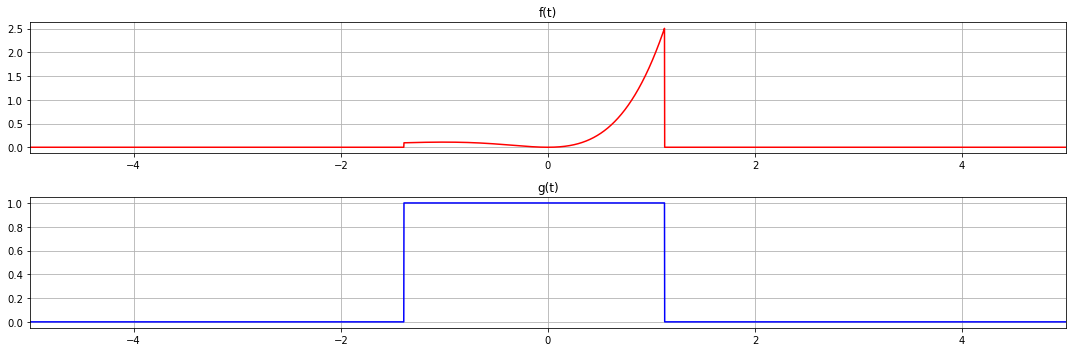

In [80]:
# Plot f(t):
plt.subplot(2, 1, 1)
plt.plot(t, f_t, color='r')
plt.title('f(t)')
plt.xlim(-5, +5)
plt.tight_layout()
plt.grid()

# Plot g(t):
plt.subplot(2, 1, 2)
plt.plot(t, g_t, color='b')
plt.title('g(t)')
plt.xlim(-5, +5)
plt.tight_layout()
plt.grid()

plt.show()

Now that we can visualize the two functions in two different plots , we should visualize them in the same plot

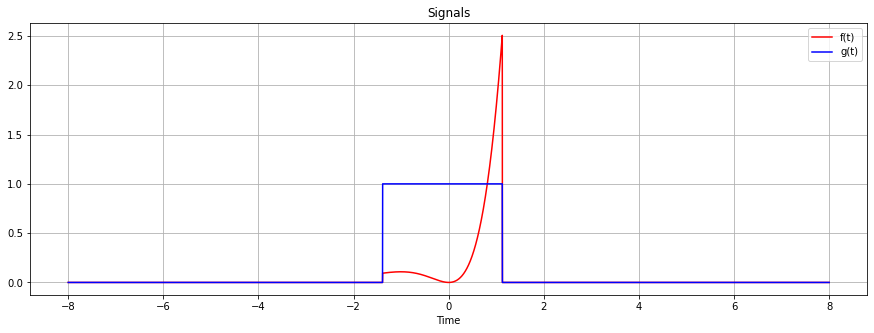

In [81]:
plt.plot(t, f_t, label='f(t)', color='r')
plt.plot(t, g_t, label='g(t)', color='b')
plt.legend()
plt.title("Signals")
plt.xlabel("Time")
plt.grid()
plt.show()

# Let's compute the convolution between $f(t)$ and $g(t)$

In the time domain , the convolution is an operation that works with two functions , in this case  $f(t)$ and $g(t)$, anc create a third function $h(t)$. 

Mathematically speaking , the convolution is the integral of the product of one function with a time reversed version of the second function, shifted by a variable x.

In [91]:
h_t = np.convolve(f_t,g_t,mode = "same")

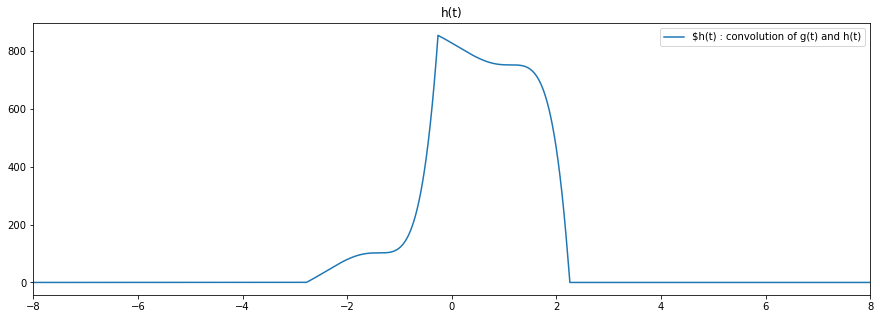

In [92]:
plt.plot(t, h_t, label="$h(t) : convolution of g(t) and h(t)")
plt.title("h(t)")
plt.xlim(-8, +8)
plt.legend()
plt.show()

Now that we have built the h(t) function , we have to verify that the same result is obtained in time domain and frequency domaion.

We have to verify the **Convolution Theorem** that tell us that : 

- If $ h(t) = f \ast g $ then $H(\omega) = F(\omega) G(\omega)$
- If $h(t) = f(t)g(t)$ then $H(\omega) = F \ast G $

In [115]:
F = np.fft.fft(f_t)
G = np.fft.fft(g_t)

FG = np.multiply(F,G)

FG_i = np.fft.ifft(FG)
FG_i_shift = np.fft.fftshift(FG_i)


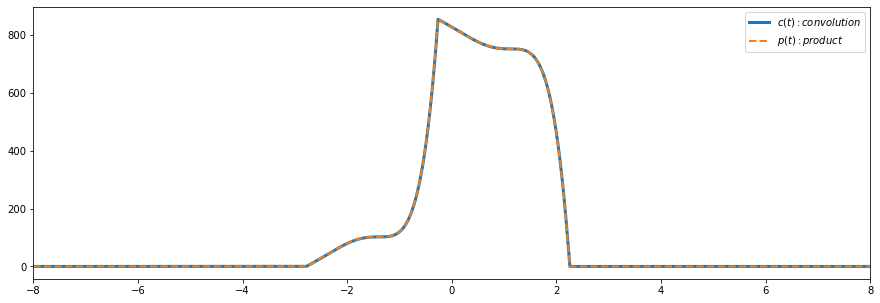

In [132]:

plt.plot(t, h_t, linewidth = '3', label=r"$c(t): convolution$")
plt.plot(t, np.real(FG_i_shift), linewidth = '2',  linestyle = 'dashed', label=r"$p(t): product$")
plt.xlim(-8, +8)
plt.legend()
plt.show()